In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

Loading the CIFAR-10 Dataset

In [ ]:
(X_train, y_train) , (X_test, y_test) = datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Training Dataset


In [ ]:
X_train.shape


(50000, 32, 32, 3)

In [ ]:
y_train.shape


(50000, 1)

In [ ]:
y_train = y_train.reshape(-1,)


Testing Dataset Now


In [ ]:
X_test.shape


(10000, 32, 32, 3)

In [ ]:
y_test.shape


(10000, 1)

# **Exploring and Analyzing the Dataset**


**Creating the Plot Sample Picture Function**


Classes from the Dataset


In [ ]:
classes = [
    "Airplane",
    "Automobile",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Ship",
    "Truck"
]

The Plot Sample Picture Function


In [ ]:
def plot_sample(index, X=X_train,y=y_train):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

Exploring 10 Random Sample Picture


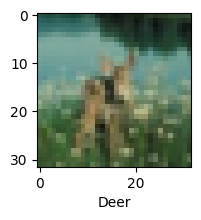

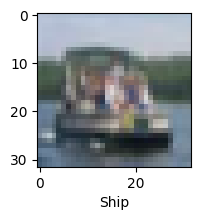

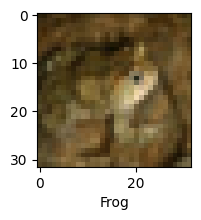

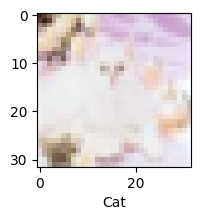

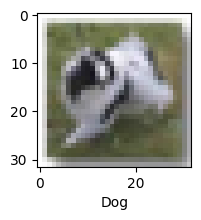

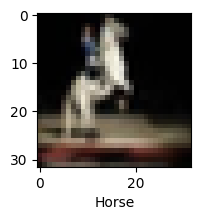

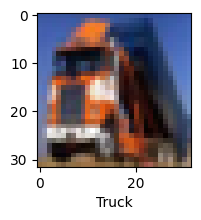

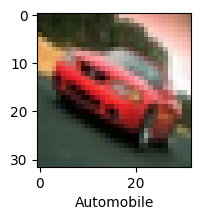

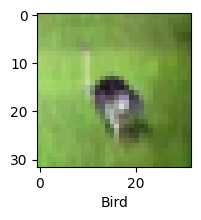

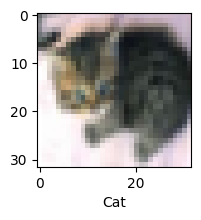

In [ ]:
import random

# Choose 10 random indices
random_indices = random.sample(range(len(X_train)), 10)

# Plot the random samples
for i in random_indices:
    plot_sample(i)

Normalizing Dataset


In [ ]:
# Reduce the pixel values
X_train, X_test = X_train / 255.0, X_test / 255.0

# Flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()

# **Creating the Machine Learning Model**

Calculating the Number of Output Layer Based on the Number of Classes


In [ ]:
# number of classes
K = len(set(y_train))

# Calculate the number of classes for output layer
print("The number of classes:", K)

The number of classes: 10


**Building the Machine Learning Model using the functional API**

In [ ]:
i = Input(shape = X_train[0].shape)
x = Conv2D(32, (3,3), activation = 'relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation = 'relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3,3), activation = 'relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation = 'relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128, (3,3), activation = 'relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation = 'relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

Hidden Layer


In [ ]:
x = Dense(1024, activation= 'relu')(x)
x = Dropout(0.2)(x)

Output Layer


In [ ]:
x = Dense(K, activation='softmax')(x)


The Model Summary


In [ ]:
model = Model(i, x)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 2,397,226 (9.14 MB)

 Trainable params: 2,396,330 (9.14 MB)

 Non-trainable params: 896 (3.50 KB)

Compiling the Machine Learning Model


In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

The First Batch of Dataset Training


In [ ]:
r = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=10)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 543s 347ms/step - accuracy: 0.9540 - loss: 0.1330 - val_accuracy: 0.8311 - val_loss: 0.7373
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 573s 354ms/step - accuracy: 0.9604 - loss: 0.1179 - val_accuracy: 0.8201 - val_loss: 0.7425
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 580s 371ms/step - accuracy: 0.9639 - loss: 0.1062 - val_accuracy: 0.8224 - val_loss: 0.8041
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 564s 361ms/step - accuracy: 0.9649 - loss: 0.1027 - val_accuracy: 0.8397 - val_loss: 0.7171
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 579s 370ms/step - accuracy: 0.9664 - loss: 0.0985 - val_accuracy: 0.8330 - val_loss: 0.7202
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 618s 368ms/step - accuracy: 0.9722 - loss: 0.0860 - val_accuracy: 0.8393 - val_loss: 0.6714
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 607s 358ms/step - accuracy: 0.9734 - loss: 0.0833 - val_accuracy: 0.8318 - val_loss: 0.7493
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 605s 387ms/step - ac

The Second Batch of Dataset Training After Data Augmentation


In [24]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1, height_shift_range=0.1, horizontal_flip = True)
train_generator = data_generator.flow(X_train, y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data = (X_test, y_test),
              steps_per_epoch = steps_per_epoch, epochs = 10)

Epoch 1/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 586s 375ms/step - accuracy: 0.8727 - loss: 0.3725 - val_accuracy: 0.8490 - val_loss: 0.4558
Epoch 2/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7500 - loss: 0.7460 - val_accuracy: 0.8504 - val_loss: 0.4530
Epoch 3/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 600s 384ms/step - accuracy: 0.8771 - loss: 0.3621 - val_accuracy: 0.8515 - val_loss: 0.4368
Epoch 4/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 42s 26ms/step - accuracy: 0.9688 - loss: 0.1632 - val_accuracy: 0.8520 - val_loss: 0.4379
Epoch 5/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 576s 369ms/step - accuracy: 0.8845 - loss: 0.3424 - val_accuracy: 0.8593 - val_loss: 0.4345
Epoch 6/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.9688 - loss: 0.1127 - val_accuracy: 0.8573 - val_loss: 0.4364
Epoch 7/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 601s 385ms/step - accuracy: 0.8893 - loss: 0.3231 - val_accuracy: 0.8646 - val_loss: 0.4172
Epoch 8/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 

# **Evaluating the Machine Learning Model**

Plot Accuracy Per Iteration


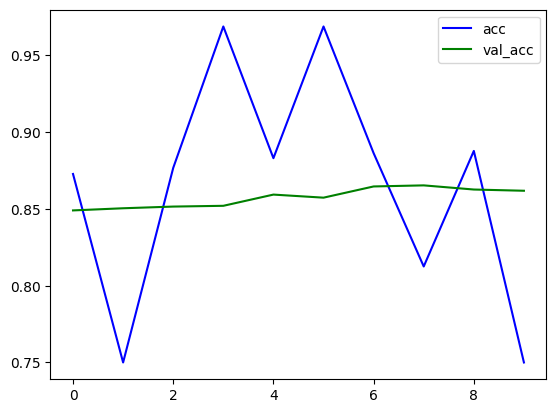

In [25]:
plt.plot(r.history['accuracy'], label = 'acc', color = 'blue')
plt.plot(r.history['val_accuracy'], label= 'val_acc', color = 'green')
plt.legend();

**Classification Report**

In [26]:
from sklearn.metrics import confusion_matrix , classification_report
classes = ["Airplane","Automobile","Bird","Cat","Deer","Dog","Frog","Horse","Ship","Truck"]
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes, target_names=classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 83ms/step
Classification Report: 
               precision    recall  f1-score   support

    Airplane       0.90      0.84      0.87      1000
  Automobile       0.93      0.95      0.94      1000
        Bird       0.83      0.79      0.81      1000
         Cat       0.74      0.74      0.74      1000
        Deer       0.88      0.81      0.85      1000
         Dog       0.81      0.80      0.81      1000
        Frog       0.86      0.90      0.88      1000
       Horse       0.87      0.93      0.90      1000
        Ship       0.94      0.92      0.93      1000
       Truck       0.85      0.95      0.89      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



**Confusion Matrix**

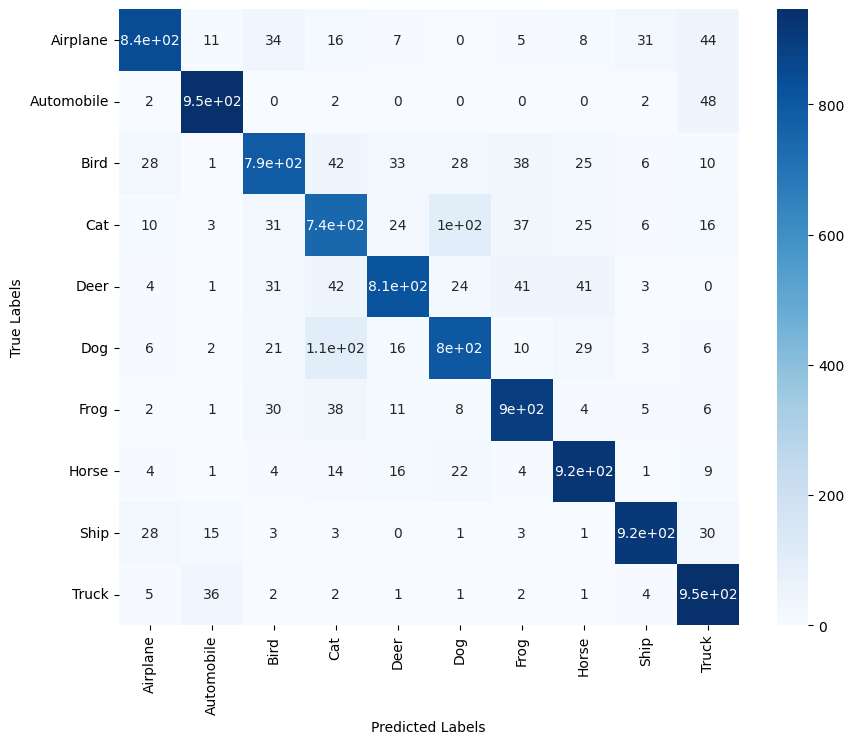

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_test, y_pred_classes)

# Set the class labels for the heatmap
class_labels = [
    "Airplane",
    "Automobile",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Ship",
    "Truck"
]

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()